## Looking at metrics as a function of model version

### Import Block

In [1]:
import os                        # import operating system functions
import sys
from socket import gethostname   # used to determine which machine we are
#                                #   running on
import matplotlib.gridspec as gridspec  # pretty subplots
import numpy as np  # for handling arrays
import xarray as xr  # for handling nd things (netcdfs)
import matplotlib.pyplot as plt  # for plotting things
from mdwtools import mdwfunctions as mwfn  # For averaging things
from mdwtools import mdwplots as mwp  # For plotting things

import cesm1to2plotter as c1to2p
# import matplotlib.cm as cm
from scipy.stats import linregress

### Load Section
#### Set flags for loading

In [47]:
# Set new variables to compute when loading
newVars = 'PRECT'

# Set flags for loading/plotting/doing things
calcPrect_flag = True
loadGpcp_flag = False
loadHadIsst_flag = False
lRunMean = 5
ocnOnly_flag = False
plotObs_flag = False
save_flag = False
saveSubDir = ''
subplotTitle_flag = False
verbose_flag = False

xTickRotation = 45
subFigCountStart = 'a'


#### Load cases and obs

Processing 01...
Processing 28...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full

Processing 36...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing ga7.66...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 119...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 125...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 161...
Processing 194...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 195...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


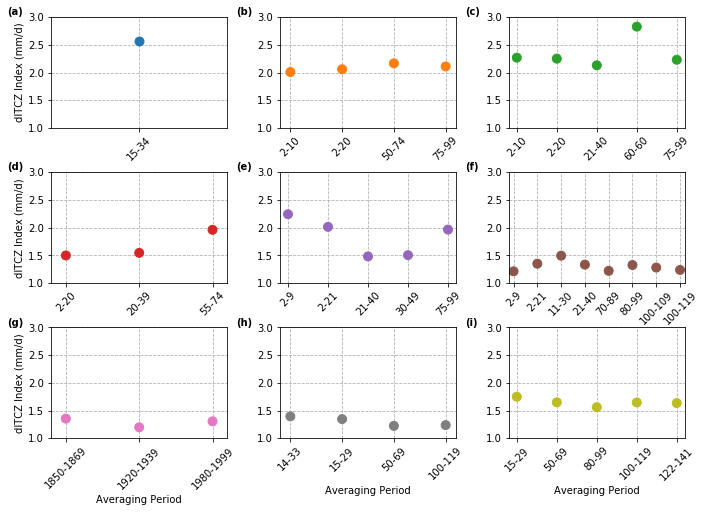

In [50]:
# Get directory of file to load
ncDir, ncSubDir, saveDir = c1to2p.setfilepaths(loadClimo_flag=False)

if gethostname()[0:6] in c1to2p.getncarmachlist(6):
    # Directories on NCAR systems may be all screwy due to changes to file
    #   system on 208-07-11 

    # Set info for "runs of convenience" from Celice at NCAR
    ncDir = '/glade/p_old/cgd/amp/people/hannay/amwg/climo/'

# Set variable for plotting
plotVar = 'PRECT'

versionIds = ['01',
              '28',
              '36',
              'ga7.66',
              # '100',
              # '113',
              # '114',
              # '116',
              # '118',
              '119',
              '125',
              '161',
              '194',
              '195'
              ]

if len(versionIds) == 9:
    hf = plt.figure()
    hf.set_size_inches(10, 6.5, forward=True)
    
    gs = gridspec.GridSpec(3, 3,
                           # height_ratios=[20, 1, 20, 1, 20],
                           hspace=(0.3
                                   if xTickRotation is None
                                   else 0.4),
                           # width_ratios=[30, 30, 1],
                           wspace=0.3,
                           )
    gs.update(left=0.07, right=0.95, top=0.95, bottom=0.05)
    
    rowInds = [0, 0, 0, 1, 1, 1, 2, 2, 2]
    colInds = [0, 1, 2, 0, 1, 2, 0, 1, 2]
    
    subplotLblLoc = (-0.25, 1.00)

skippedPlotCount = 0

axList = [None]*len(rowInds)
    
# Set name(s) of file(s) to load
for jId, versionId in enumerate(versionIds):

    if versionId is None:
        skippedPlotCount = skippedPlotCount + 1
        continue
    
    axList[jId] = plt.subplot(gs[rowInds[jId], colInds[jId]])

    print('Processing {:s}...'.format(versionId))
    caseBase = c1to2p.getcasebase(versionId)
    yrIds = c1to2p.getavailableyearslist(versionId)
    yrDirs = c1to2p.getyearsubdirs(versionId)
    fileName = caseBase + '_ANN_climo.nc'

    # Create list of files to load
    loadFiles = {yid: (ncDir + caseBase + '/' +
                       yrDirs[jId] + '/' + fileName)
                 for jId, yid in enumerate(yrIds)}

    # Open netcdf file(s)
    dataSets = {yid: xr.open_dataset(loadFiles[yid])
                for yid in yrIds}

    # Compute PRECT if needed
    if calcPrect_flag:
        for yid in yrIds:
            if verbose_flag:
                print(yid)
            dataSets[yid]['PRECT'] = mwfn.calcprectda(dataSets[yid])

    # Add version id to dataSets for easy access and bookkeeping
    for yid in yrIds:
        if all([yid == '0.9x1.25',
                versionId == '01']):
            dataSets[yid].attrs['yid'] = '15-34'
        else:
            dataSets[yid].attrs['yid'] = yid

    # Load GPCP
    if loadGpcp_flag:
        # Set directories for GPCP
        gpcpDir = '/home/disk/eos9/woelfle/dataset/GPCP/climo/'
        gpcpFile = 'gpcp_197901-201012.nc'
        gpcpClimoFile = 'gpcp_197901-201012_annclimo.nc'

        # Load GPCP from both climo and add id
        gpcpDs = xr.open_dataset(gpcpDir + gpcpFile)
        gpcpDs.attrs['id'] = 'GPCP'

    if loadHadIsst_flag:
        hadIsstDs = mwfn.loadhadisst(daNewGrid=None,
                                     kind='linear',
                                     newGridFile=None,
                                     newGridName='0.9x1.25',
                                     newLat=None,
                                     newLon=None,
                                     qc_flag=False,
                                     regrid_flag=True,
                                     # whichHad='pd_monclimo',
                                     whichHad='all',
                                     )

    # %% Plot bias indices across averaging period

    # Set flags and other options based on variable to be plotted
    if plotVar == 'TS':
        latLim = np.array([-3, 3])
        lonLim = np.array([180, 220])
        try:
            obsDs = hadIsstDs
        except NameError:
            obsDs = None
        obsVar = 'sst'
        ocnOnly_flag = True
        rmRefRegMean_flag = True
        refLatLim = np.array([-20, 20])
        refLonLim = np.array([150, 250])
        yLim = np.array([-2.0, 1.0])
    elif plotVar in ['PRECT', 'PRECC', 'PRECL']:
        latLim = np.array([-20, 0])
        lonLim = np.array([210, 260])
        try:
            obsDs = gpcpDs
        except NameError:
            obsDs = None
        obsVar = 'precip'
        ocnOnly_flag = ocnOnly_flag
        rmRefRegMean_flag = False
        refLatLim = np.array([0, 0])
        refLonLim = np.array([0, 0])
        yLim = np.array([1.00, 3.00])
    else:
        latLim = np.array([-20, 20])
        lonLim = np.array([120, 270])
        ocnOnly_flag = False
        rmRefRegMean_flag = False
        refLatLim = np.array([0, 0])
        refLonLim = np.array([0, 0])
        yLim = None

    # Create dictionary to hold annual mean value (and colors)
    annMean = dict()
    colorDict = dict()

    # Determine if obs are available to plot
    if obsDs is None:
        plotObs_flag = False

    # Compute regional mean over double-ITCZ region as defined in
    #   Bellucci et al. (2010, J Clim)
    # latLim = np.array([-20, 0])
    # lonLim = np.array([210, 260])

    for yid in yrIds:
        # Compute regional mean through time
        regMeanDa = mwfn.calcdaregmean(dataSets[yid][plotVar],
                                       gwDa=dataSets[yid]['gw'],
                                       latLim=latLim,
                                       lonLim=lonLim,
                                       ocnOnly_flag=ocnOnly_flag,
                                       qc_flag=False,
                                       landFracDa=(
                                           dataSets[yid]['LANDFRAC']),
                                       stdUnits_flag=True,
                                       )

        # Compute reference regional mean if needed
        if rmRefRegMean_flag:
            refRegMeanDa = mwfn.calcdaregmean(
                dataSets[yid][plotVar],
                gwDa=dataSets[yid]['gw'],
                latLim=refLatLim,
                lonLim=refLonLim,
                ocnOnly_flag=ocnOnly_flag,
                landFracDa=dataSets[yid]['LANDFRAC'],
                qc_flag=False,
                stdUnits_flag=True,
                )
            regMeanDa = regMeanDa - refRegMeanDa

        annMean[yid] = regMeanDa.mean(dim='time')

    # Compute regional mean of observations
    if plotObs_flag:
        obsRegMeanDa = mwfn.calcdaregmean(obsDs[obsVar],
                                          gwDa=None,
                                          latLim=latLim,
                                          lonLim=lonLim,
                                          stdUnits_flag=True,
                                          )
        # Compute regional mean of reference region for observations
        if rmRefRegMean_flag:
            obsRefRegMeanDa = mwfn.calcdaregmean(obsDs[obsVar],
                                                 gwDa=None,
                                                 latLim=refLatLim,
                                                 lonLim=refLonLim,
                                                 stdUnits_flag=True,
                                                 )

            obsRegMeanDa = obsRegMeanDa - obsRefRegMeanDa

        annMean['obs'] = obsRegMeanDa.mean(dim='time')

        # Get running means of given length (for error bars)
        try:
            obsRegAnnMeans = (
                obsRegMeanDa.data.reshape([
                    int(obsRegMeanDa.size/12), 12]).mean(axis=1)
                )
        except ValueError:
            obsRegAnnMeans = (
                obsRegMeanDa.data[
                    :-np.mod(obsRegMeanDa.data.size, 12)
                    ].reshape([int(obsRegMeanDa.size/12),
                               12]).mean(axis=1)
                )
        obsRunMean = np.array([
            np.mean(obsRegAnnMeans[j:j+lRunMean])
            for j in np.arange(0, obsRegAnnMeans.size-lRunMean)])

    # Plot annual mean values
    # plt.figure()
    plotAnnMeans = [annMean[yid] for yid in yrIds]
    plt.scatter(np.arange(1, len(plotAnnMeans) + 1),
                np.array(plotAnnMeans),
                marker='o',
                c=[c1to2p.getcolordict()[versionId] for yid in yrIds],
                s=80,
                )
    if plotObs_flag:
        plt.scatter([len(annMean)],
                    annMean['obs'],
                    marker='^',
                    c=c1to2p.getcolordict()['obs'],
                    s=80,
                    )
        # Add observational error if possible
        try:
            # plt.gca().errorbar(3, 2, yerr=[[1], [3]])
            plt.errorbar(len(annMean),
                         annMean['obs'].data,
                         # xerr=[1, 1],  # 0,
                         yerr=[[annMean['obs'].data -
                                np.min(obsRunMean)],
                               [np.max(obsRunMean) -
                                annMean['obs'].data]],
                         c='k'
                         )
            obsLbl = 'obs\n({:d})'.format(lRunMean)
        except ValueError:
            obsLbl = 'obs'
            print('oops')

    plt.xlim([0.8, len(annMean) + 0.2])
    if plotObs_flag:
        plt.xticks(np.arange(1, len(annMean) + 1),
                   yrIds + [obsLbl])
    else:
        plt.xticks(np.arange(1, len(annMean) + 1),
                   [dataSets[yid].yid for yid in yrIds])
    # Rorate xticks if requested
    if xTickRotation is not None:
        for tick in axList[jId].get_xticklabels():
            tick.set_rotation(xTickRotation)
    # Add xlabel only to bottom-most plotted row
    plt.xlabel('Averaging Period')
    # if all([rowInds[jId] > 0,
    #         axList[jId-max(colInds)-1] is not None
    #         ]):
    try:
        plt.sca(axList[jId-max(colInds)-1])
        plt.xlabel('')
        plt.sca(axList[jId])
    except ValueError:
        # Will give error when axes above does not yet exists
        # This is ok.
        pass

    if all([plotVar == 'TS',
            rmRefRegMean_flag,
            all(latLim == np.array([-3, 3])),
            all(lonLim == np.array([180, 220])),
            all(refLatLim == np.array([-20, 20])),
            all(refLonLim == np.array([150, 250])),
            ]):
        plt.ylabel('CTI ({:s})'.format(dataSets[yid][plotVar].units))
    elif all([plotVar == 'PRECT',
              all(latLim == np.array([-20, 0])),
              all(lonLim == np.array([210, 260]))
             ]):
        plt.ylabel('dITCZ Index (mm/d)')
    else:
        plt.ylabel(plotVar + ' (' +
                   mwp.getlatlimstring(latLim) + ', ' +
                   mwp.getlonlimstring(lonLim, lonFormat='EW') + ')'
                   )
    plt.ylim(yLim)
    # Clear y label from all but right-most plotted column
    if colInds[jId] > 0:
        plt.ylabel('')

    plt.grid(ls='--')
    plt.gca().set_axisbelow(True)

    if subplotTitle_flag:
        if plotVar in ['PRECT', 'PRECC', 'PRECL']:
            plt.title('Annual mean 2xITCZ index ({:s}) for v{:s}'.format(
                plotVar, versionId))
        elif plotVar in ['TS']:
            plt.title('Annual mean CT index ({:s}) for v{:s}'.format(
                plotVar, versionId))
    else:
        plt.title('')

    axList[jId].annotate('(' +
                         chr(jId +
                             ord(subFigCountStart) -
                             skippedPlotCount
                             ) +
                         ')',
                         # xy=(-0.12, 1.09),
                         xy=subplotLblLoc,
                         xycoords='axes fraction',
                         horizontalalignment='left',
                         verticalalignment='bottom',
                         fontweight='bold',
                         )
        
    # plt.show()
    # plt.tight_layout()

    if save_flag:
        if plotVar in ['PRECT', 'PRECC', 'PRECL']:
            mwp.savefig(saveDir + saveSubDir +
                        'annmean_dITCZindex_v{:s}'.format(versionId) +
                        ('_obsMn{:02d}'.format(lRunMean)
                         if plotObs_flag else ''))
        elif plotVar in ['TS']:
            mwp.savefig(saveDir + saveSubDir +
                        'annmean_CTI_v{:s}'.format(versionId) +
                        ('_obsMn{:02d}'.format(lRunMean)
                         if plotObs_flag else ''))

plt.show()